In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('imdb_top_1000.csv')

In [83]:
print(data.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [84]:
print(data.describe())

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


In [85]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [86]:
data = data.dropna()

In [87]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [88]:
print("\nDuplicate rows:")
print(data.duplicated().sum())



Duplicate rows:
0


In [89]:
data_cleaned = data.dropna()

In [90]:
empty_cells = data.isnull()

In [91]:
data['Certificate'].value_counts()

U           183
A           174
UA          142
R           131
PG-13        38
PG           19
Passed        9
G             9
Approved      6
TV-PG         1
GP            1
U/A           1
Name: Certificate, dtype: int64

In [92]:
data['Certificate'].fillna('U',inplace=True)

In [93]:
row_count = len(data)

In [94]:
print(f'The DataFrame has {row_count} rows.')

The DataFrame has 714 rows.


In [95]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       IMDB_Rating  Meta_score   No_of_Votes
count   714.000000  714.000000  7.140000e+02
mean      7.937115   77.158263  3.561348e+05
std       0.293278   12.401144  3.539011e+05
min       7.600000   28.000000  2.522900e+04
25%       7.700000   70.000000  9.600975e+04
50%       7.900000   78.000000  2.366025e+05
75%       8.100000   86.000000  5.077922e+05
max       9.300000  100.000000  2.343110e+06


In [96]:
features = ['Series_Title','Released_Year','Runtime','Genre', 'IMDB_Rating','Meta_score','Director','Gross']
cleaned_data = data[features].dropna()

In [97]:
cleaned_data

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,"4,360,000"
...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,"696,690"
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,"1,378,435"
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,"141,843,612"
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,"13,780,024"


In [98]:
cleaned_data.Genre

0                             Drama
1                      Crime, Drama
2              Action, Crime, Drama
3                      Crime, Drama
4                      Crime, Drama
                   ...             
990             Drama, War, Western
991          Adventure, Comedy, War
992    Animation, Adventure, Family
994          Comedy, Music, Musical
997             Drama, Romance, War
Name: Genre, Length: 714, dtype: object

In [99]:
print("Dataset Info:")
print(cleaned_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 8 columns):
Series_Title     714 non-null object
Released_Year    714 non-null object
Runtime          714 non-null object
Genre            714 non-null object
IMDB_Rating      714 non-null float64
Meta_score       714 non-null float64
Director         714 non-null object
Gross            714 non-null object
dtypes: float64(2), object(6)
memory usage: 50.2+ KB
None


In [100]:
cleaned_data.Gross

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
990        696,690
991      1,378,435
992    141,843,612
994     13,780,024
997     30,500,000
Name: Gross, Length: 714, dtype: object

In [101]:
cleaned_data.Released_Year

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
990    1971
991    1970
992    1967
994    1964
997    1953
Name: Released_Year, Length: 714, dtype: object

In [102]:
cleaned_data.sort_values("IMDB_Rating")

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,"30,500,000"
908,Kick-Ass,2010,117 min,"Action, Comedy, Crime",7.6,66.0,Matthew Vaughn,"48,071,303"
910,Moneyball,2011,133 min,"Biography, Drama, Sport",7.6,87.0,Bennett Miller,"75,605,492"
911,La piel que habito,2011,120 min,"Drama, Horror, Thriller",7.6,70.0,Pedro Almodóvar,"3,185,812"
912,Zombieland,2009,88 min,"Adventure, Comedy, Fantasy",7.6,73.0,Ruben Fleischer,"75,590,286"
...,...,...,...,...,...,...,...,...
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,"4,360,000"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,"57,300,000"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"534,858,444"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"134,966,411"


In [103]:
cleaned_data.sort_values(
    by=["IMDB_Rating"],
    ascending=[False])

              

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,"4,360,000"
...,...,...,...,...,...,...,...,...
914,Sherlock Holmes,2009,128 min,"Action, Adventure, Mystery",7.6,57.0,Guy Ritchie,"209,028,679"
912,Zombieland,2009,88 min,"Adventure, Comedy, Fantasy",7.6,73.0,Ruben Fleischer,"75,590,286"
911,La piel que habito,2011,120 min,"Drama, Horror, Thriller",7.6,70.0,Pedro Almodóvar,"3,185,812"
910,Moneyball,2011,133 min,"Biography, Drama, Sport",7.6,87.0,Bennett Miller,"75,605,492"


In [104]:
top_rated_movies = cleaned_data.sort_values(by='IMDB_Rating', ascending=False)
print(top_rated_movies.head(100))


                 Series_Title Released_Year  Runtime  \
0    The Shawshank Redemption          1994  142 min   
1               The Godfather          1972  175 min   
2             The Dark Knight          2008  152 min   
3      The Godfather: Part II          1974  202 min   
4                12 Angry Men          1957   96 min   
..                        ...           ...      ...   
98            American Beauty          1999  122 min   
99          Good Will Hunting          1997  126 min   
100         Bacheha-Ye aseman          1997   89 min   
101                 Toy Story          1995   81 min   
102                Braveheart          1995  178 min   

                            Genre  IMDB_Rating  Meta_score  \
0                           Drama          9.3        80.0   
1                    Crime, Drama          9.2       100.0   
2            Action, Crime, Drama          9.0        84.0   
3                    Crime, Drama          9.0        90.0   
4                

In [105]:
specific_range = top_rated_movies.iloc[1:100]

In [106]:
specific_range

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,"377,845,905"
...,...,...,...,...,...,...,...,...
98,American Beauty,1999,122 min,Drama,8.3,84.0,Sam Mendes,"130,096,601"
99,Good Will Hunting,1997,126 min,"Drama, Romance",8.3,70.0,Gus Van Sant,"138,433,435"
100,Bacheha-Ye aseman,1997,89 min,"Drama, Family, Sport",8.3,77.0,Majid Majidi,"933,933"
101,Toy Story,1995,81 min,"Animation, Adventure, Comedy",8.3,95.0,John Lasseter,"191,796,233"


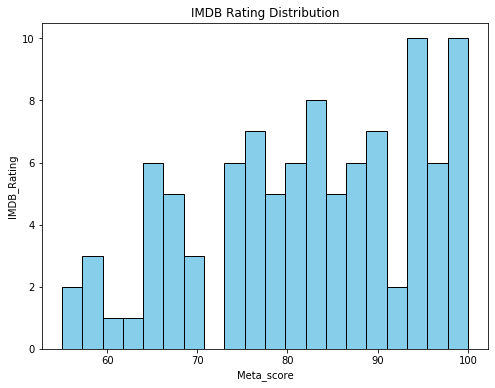

In [107]:
plt.figure(figsize=(8, 6))
plt.hist(specific_range['Meta_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('IMDB Rating Distribution')
plt.xlabel('Meta_score')
plt.ylabel('IMDB_Rating')
plt.show()

In [108]:
specific_range.to_csv('IMDB_top_100_Rating_Movies.csv', index=False)
